In [1]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from local_helper import * # local package

In [2]:
FILE_PATH = "datasets/file_1.csv"

In [3]:
from ctypes import *

so_file = "./c/c_code.so"
c_code  = CDLL(so_file)

In [5]:
# spectral() function
c_code.spectral.argstype = [c_int, c_int, POINTER(c_char), c_int]
c_code.spectral.restype  = POINTER(POINTER(c_float))

# free_floatPP() function
c_code.free_floatPP.argtypes = [POINTER(POINTER(c_float))]
c_code.free_floatPP.restype  = None

In [6]:
path = FILE_PATH.encode('utf-8')
read_rows = fileDepth(FILE_PATH)
data_len  = fileWidth(FILE_PATH)
knn = 20
print(f"Depth: {read_rows} | Width: {data_len}")

Depth: 300 | Width: 3


In [7]:
out = c_code.spectral(data_len, read_rows, path, knn)


REQ_DATA_LEN: 3 	TRU_DATA_LEN: 3
REQ_N_ROWS  : 300 	TRU_N_ROWS  : 300+1


0	-8.028029 -9.004721 2.000000 
1	-9.030661 -7.841498 2.000000 
2	-0.452835 5.962177 0.000000 
3	4.095676 4.720112 1.000000 
4	-11.974938 -9.400326 2.000000 
300x3 matrix. 5x3 printed.

k of clusters: 3

0	-8.028029 -9.004721 
1	-9.030661 -7.841498 
2	-0.452835 5.962177 
3	4.095676 4.720112 
4	-11.974938 -9.400326 
300x2 matrix. 5x2 printed.


0	0.000000 2.165854 22.542091 25.848537 4.342514 
1	2.165854 0.000000 22.381500 25.687946 4.503105 
2	22.542091 22.381500 0.000000 5.790576 26.884605 
3	25.848537 25.687946 5.790576 0.000000 30.191051 
4	4.342514 4.503105 26.884605 30.191051 0.000000 
300x300 matrix. 5x5 printed.


0	0.000000 1.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 1.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.0000

In [8]:
l = lp_lp_float_c_to_list_2d(out, read_rows)

In [13]:
for row in l:
    if row.count(1) != knn:
        print(False)
        break
else: print(True)

True


In [14]:
all_dots = readCsv(FILE_PATH)

cls = [int(dot[2]) for dot in all_dots]
cls_set = set(cls)
x = [dot[0] for dot in all_dots]
y = [dot[1] for dot in all_dots]

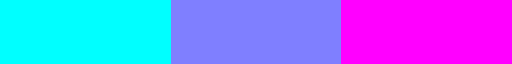

In [15]:
jet = mpl.colormaps['cool'].resampled(len(cls_set))
jet

In [16]:
def setupMPL():
    font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

    mpl.rc('font', **font)

    fig, axis = plt.subplots(2,2, figsize=(20,20))
    fig.subplots_adjust(top=.94, hspace=.2, wspace=.2) #, bottom=0, left=0, right=1, wspace=.15, hspace=.15)
    fig.suptitle("file_1.csv Clustering", y=.98)

    cmap    = jet
    classes = list(cls_set)
    bounds  = np.arange(classes[0]-.5, classes[-1]+1.5, 1)
    norm    = mpl.colors.BoundaryNorm(bounds, cmap.N)
    map     = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(map, ax=axis, ticks=classes, orientation='horizontal', pad=0.05)

    axis[0,0].set_title("X algorithm")
    axis[0,0].set_xlim([-15, 20])
    axis[0,0].set_ylim([-15, 20])

    axis[0,1].set_title("Y algorithm")
    axis[0,1].set_xlim([-15, 20])
    axis[0,1].set_ylim([-15, 20])

    axis[1,0].set_title("Z algorithm")
    axis[1,0].set_xlim([-15, 20])
    axis[1,0].set_ylim([-15, 20])

    axis[1,1].set_title("I algorithm")
    axis[1,1].set_xlim([-15, 20])
    axis[1,1].set_ylim([-15, 20])
    return fig, axis

In [17]:
def plot(fig, axis, x, y, all_dots, some_dots, w:int):
    x1 = [dot[0] for dot in some_dots]
    y1 = [dot[1] for dot in some_dots]
    axis[0,0].cla()
    axis[0,0].set_xlim([-15, 20])
    axis[0,0].set_ylim([-15, 20])
    axis[0,0].scatter(x, y, c=cls, cmap=jet)
    axis[0,0].scatter(x1, y1, c='black')
    axis[0,0].scatter(all_dots[w][0], all_dots[w][1], c='r')

    display(fig)
    clear_output(wait=True)
    plt.pause(1)

In [18]:
def playKNN(fig, axis, x, y, all_dots):
    for w in range(read_rows):
        some_dots = []
        for i, dot in enumerate(l[w]):
            if dot==1:
                some_dots.append(all_dots[i])
        plot(fig, axis, x, y, all_dots, some_dots, w)

In [19]:
fig, axis = setupMPL()

# Plot a graph that shows knn neighbours for each dot over time in Jupyter Notebook.
playKNN(fig, axis, x, y, all_dots)

KeyboardInterrupt: 

In [ ]:
# TO-DO
# kNN
# Gaussian Mixture Model
# DBSCAN
# Spectral Clustering
# Birch Algorithm
# Mean-Shift
# Affinity Propagation
# OPTICS Algorithm